In [22]:
clear all
addpath('./Biblioteca')
graphics_toolkit ("gnuplot"); %% Comando solo para jupyter notebooks
output_precision(16)
fmt='%5u\t %+17.17f\t %+17.17f\n';

In [23]:
g = 9.807;
T0 = (2*pi)/sqrt(g);

a = 0;
b = 3;

f = @(x,alpha) 1./sqrt(1-((sin(alpha/2)).^2.*(sin(x)).^2));

In [34]:
function [x, fx, numpasos] = secante_mod(x0, x1, tol, maxit)
    numpasos = 1;
    imprime = 0;
    fmt='%5u\t %+17.17f\t %+17.17f\n';

    f = @(x,alpha) 1./sqrt(1-((sin(alpha/2)).^2.*(sin(x)).^2));
    g = 9.807;

    alpha_0 = x0;
    g0 = @(x) f(x, alpha_0);
    ga0 = simpson(g0, 0, pi/2, 100) * (2/pi);

    alpha_1 = x1;
    g1 = @(x) f(x, alpha_1);
    ga1 = simpson(g1, 0, pi/2, 100) * (2/pi);

    if (imprime == 1) 
      printf(fmt,numpasos,alpha_1,ga1)
    endif

    while numpasos <= maxit
        numpasos += 1;
        if (abs(ga1 - ga0))<eps
            disp('Pendiente = 0');
            return;
        endif

        d = ga1 * (alpha_1 - alpha_0)/(ga1 - ga0);

        alpha_0 = alpha_1;
        ga0 = ga1;

        alpha_1 = alpha_1 - d;
        g1 = @(x) f(x, alpha_1);
        ga1 = simpson(g1, 0, pi/2, 100) * (2/pi);

        if (imprime == 1) 
            printf(fmt,numpasos,alpha_1,ga1)
        endif

        abs(d)
        tol*(1+abs(alpha_1))

        if (abs(d)<=tol*(1+abs(alpha_1)))
            if abs(ga1) <= tol
                return;
            endif
        endif

    endwhile
    disp('No hay convergencia.')
endfunction

ans = 0.884987693637568
ans = 2.615012306362431e-14
ans = 2.343121774284560
ans = 1.728109467922128e-14
ans = 15.29979946318217
ans = 1.702790893110430e-13
ans = 30.70729242903437
ans = 1.567938349793006e-13
ans = 62.51409805457373
ans = 7.819348155250380e-13
ans = 586.3460219150603
ans = 6.645395034675642e-12
ans = 2541.244491346767
ans = 1.878704987879203e-11
ans = 4803.015680661879
ans = 6.681720668541082e-11
ans = 37857.23679173915
ans = 3.117751612319807e-10
ans = 205583.2283794865
ans = 2.367607445026845e-09
ans = 326390.2975849724
ans = 8.963155308228787e-10
ans = 200213.3158245338
ans = 2.898448689068216e-09
ans = 5500375.032571138
ans = 5.790219901477959e-08
ans = 397871866.8837698
ans = 4.036620867852477e-06
ans = 1947167502.622545
ans = 1.543505417837298e-05
ans = 17592740215.55389
ans = 1.913624563339119e-04
ans = 63531630071.23197
ans = 4.439538443984079e-04
ans = 118226842581.9274
ans = 1.626222270217682e-03
ans = 6107571921424.664
ans = 6.270194148446433e-02
ans = 1.2047

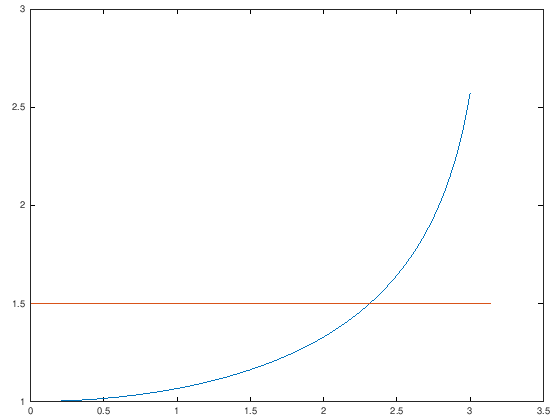

In [35]:
interval = linspace (0, 3, 500);

figure(1)
for i=1:length(interval)
    h = @(x) f(x, interval(i));
    T(i) = (simpson(h, 0, pi/2, 100) * 2/pi);
endfor

plot(interval, T, [0, pi], [1.5, 1.5])
hold on

x0 = 3;
x1 = 2.5;

[alpha, ga numpasos] = secante_mod(x0, x1, 1E-14, 50);
alpha

plot(alpha, ga, '*')

    1	 +2.50000000000000000	 +0.14298239844576566
    2	 +2.42298294665178293	 +0.07798822291469354
    3	 +2.33056815600824185	 +0.01008845547591974
    4	 +2.31683729159012008	 +0.00079951874313955
    5	 +2.31565544658701494	 +0.00000884684192415
    6	 +2.31564222290231703	 +0.00000000784016096
    7	 +2.31564221117295910	 +0.00000000000007683
    8	 +2.31564221117284408	 +0.00000000000000000
    9	 +2.31564221117284408	 +0.00000000000000000
x = 2.315642211172844
fx = 0
n = 9
solucion: 2.315642211172844e+00

Método de la secante
La aproximación obtenida en   9 pasos es: 7.370918086808094e-01 *pi



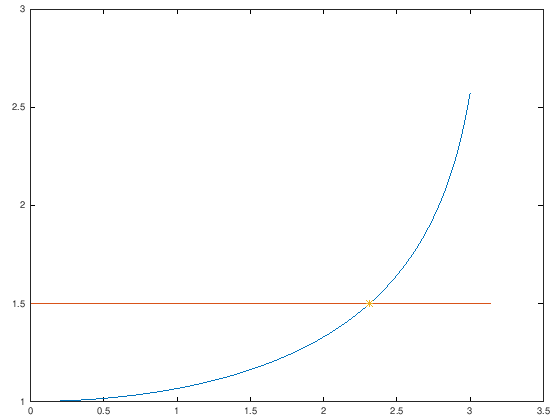

In [11]:
clear all

g=9.807;

H=@(z,a) 1./sqrt(1-((sin(a/2)).^2.*(sin(z)).^2));


function [x,fx,npasos]=misecante(x0,x1,tol,maxit)
  H=@(z,a) 1./sqrt(1-((sin(a/2)).^2.*(sin(z)).^2));
  npasos=1;
  imprime=1;
  fmt='%5u\t %+17.17f\t %+17.17f\n';
  x=x1;
  f=@(z) H(z,x);
  fx=2*gaussLegendre(f,0,pi/2,50,10)/pi-1.5;
  x_0=x0;
  f=@(z) H(z,x_0);
  fx_0=2*gaussLegendre(f,0,pi/2,50,10)/pi-1.5;
  
  if (imprime==1) 
      printf(fmt,npasos,x,fx)
  endif
    while npasos <= maxit
      npasos = npasos +1;
      if( abs(fx-fx_0)<eps )
        disp('Secante: pendiente nula');
        return;
      end
      deltax=fx*(x-x_0)/(fx-fx_0);
      x_0=x;
      fx_0=fx;
      x=x-deltax;
      f=@(z) H(z,x);
      fx=2*gaussLegendre(f,0,pi/2,50,10)/pi-1.5;
      if (imprime==1) 
         printf(fmt,npasos,x,fx)
      endif   
      if and((abs(deltax)<=tol*(1+abs(x))),(abs(fx)<=tol) )       
      return;
      endif
     endwhile
     disp('Secante: No hay convergencia '); 
endfunction



z=linspace(0,3,200);
figure(1)
for k=1:length(z)
  f=@(x) H(x,z(k));
  C(k)=2*gaussLegendre(f,0,pi/2,50,10)/pi;
endfor 
plot(z,C,[0,pi],[1.5,1.5])
hold on
pause(3)

x0=3;
x1=2.5;
[x,fx,n]=misecante(x0,x1,1E-14,20)
printf('solucion: %15.15e\n',x)
plot(x,fx+1.5,'*')
display('')
display('Método de la secante')
printf('La aproximación obtenida en %3u pasos es: %15.15e *pi\n',n,x/pi)
display('')